# Importing the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plot the yield curve

In [2]:
# Data from Excel sheets

corp_data = {
    "ISIN": ["ENB4296382", "ENB5271981", "ENB4513419", "ENB5698929", "ENB4912102", 
             "ENB5698930", "ENB3703678", "ENB5210531", "ENB3706968", "ENB3674174", "ENB3685015"],
    "Maturity date": ["10/15/2025", "10/4/2026", "7/15/2027", "11/15/2028", "11/15/2029",
                      "11/15/2030", "7/15/2032", "8/1/2033", "12/15/2034", "4/15/2038", "9/15/2040"],
    "Yields": ["5.44%", "4.59%", "4.48%", "4.71%", "4.780%", "4.98%", "5.62%", "5.29%", "5.65%", "6.05%", "5.98%"]
}

gov_data = {
    "ISIN": ["US91282CAQ42", "US912828YG91", "US91282CKZ31", "US912810PZ57", "US912828YS30", 
             "US91282CAV37", "US91282CEZ05", "US91282CHP95", "US91282CLF67", "US912810PX00", "US912810QK79"],
    "Maturity date": ["10/15/2025", "9/30/2026", "7/15/2027", "1/15/2029", "11/15/2029",
                      "11/15/2030", "7/15/2032", "7/15/2033", "8/15/2034", "5/15/2038", "8/15/2040"],
    "Yields": ["0.220%", "3.910%", "3.770%", "2.550%", "3.850%", "3.980%", "1.800%", "4.140%", 
               "4.240%", "4.420%", "4.620%"]
}

In [3]:
# Create dataframes

df_enb = pd.DataFrame(corp_data)
df_gov = pd.DataFrame(gov_data)

df_enb['Maturity Year'] = pd.to_datetime(df_enb['Maturity date'], format='%m/%d/%Y').dt.year
df_enb['Yield (%)'] = df_enb['Yields'].str.rstrip('%').astype(float)

df_gov['Maturity Year'] = pd.to_datetime(df_gov['Maturity date'], format='%m/%d/%Y').dt.year
df_gov['Yield (%)'] = df_gov['Yields'].str.rstrip('%').astype(float)

x_enb = list(range(1, len(df_enb) + 1))
x_gov = list(range(1, len(df_gov) + 1))

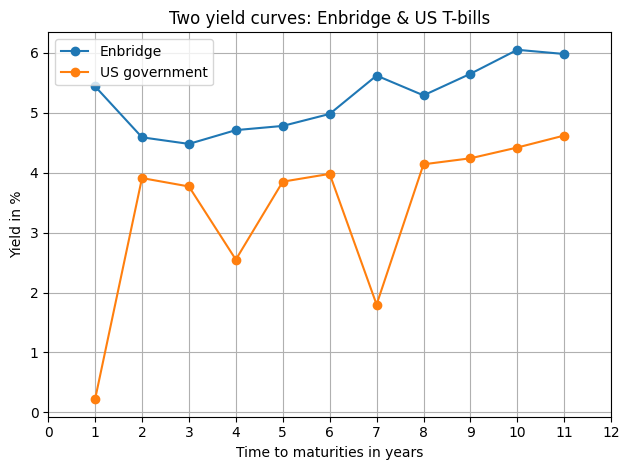

In [4]:
# Plot
plt.figure()
plt.plot(x_enb, df_enb['Yield (%)'], marker='o', label='Enbridge')
plt.plot(x_gov, df_gov['Yield (%)'], marker='o', label='US government')
plt.xticks(range(13))
plt.xlabel('Time to maturities in years')
plt.ylabel('Yield in %')
plt.title('Two yield curves: Enbridge & US T-bills')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate two-states Markov model

In [5]:
# Data from excel

h = 1.47049 / 100

R = 50 / 100 # Assumption 50% recovery rate

In [6]:
# Find the matrix

q = (np.exp(-h) - R) / (1 - R)

markov = np.array([
    [q, 1 - q],
    [0, 1]
])

print(markov)

[[0.97080538 0.02919462]
 [0.         1.        ]]


# Generating PD curve

In [7]:
# Calculating PD for the next 15 years

PD_list = []

current_matrix = np.copy(markov)

for year in range(1, 16):
    current_matrix = np.matmul(current_matrix, markov)
    PD = current_matrix[0, 1] * 100
    PD_list.append(PD)

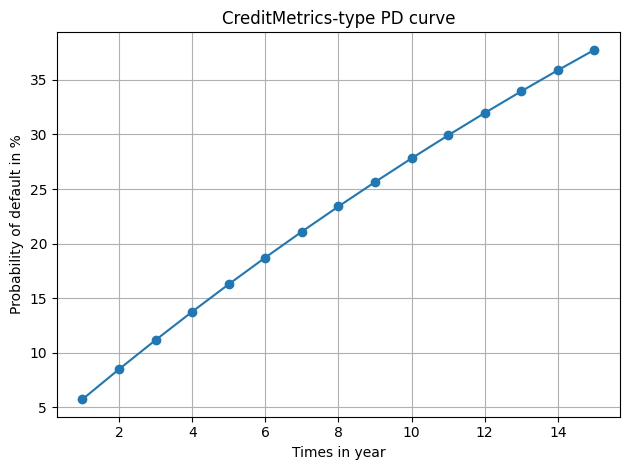

In [8]:
# Plot

years = np.arange(1, 16)

plt.figure()
plt.plot(years, PD_list, marker='o')
plt.title('CreditMetrics-type PD curve')
plt.xlabel('Times in year')
plt.ylabel('Probability of default in %')
plt.grid(True)
plt.tight_layout()
plt.show()